# Đề tài 1. # 
Động đất Nepal 2015 là một trận động đất mạnh khoảng 7,8 hoặc 8,1 độ xảy ra hồi 11:56 NST vào thứ bảy ngày
25 tháng 4 năm 2015. Sau khi cuộc động đất xảy ra, đã có rất nhiều cuộc điều tra khảo sát thực địa nhằm xác định thiệt hại
của các tòa nhà. Tuy nhiên, tại Nepal có số lượng rất lớn các tòa nhà cũng với đặc tính, điều kiện môi trường xung quanh
khác nhau nên việc xác định mức độ thiệt hại của các tòa nhà là rất khó khăn. Mục tiêu của đề tài này là đề xuất một công
cụ dựa trên Học máy nhằm giúp những người thực hiện khảo sát dễ dàng đánh giá mức độ thiệt hại của các tòa nhà trong
khu vực (Phụ lục).

## Import Library ##

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score


## Load Data ##

In [87]:
X = pd.read_csv("train_values.csv", index_col="building_id")
y = pd.read_csv("train_labels.csv", index_col="building_id")
X_test = pd.read_csv("test_values.csv", index_col="building_id")


In [88]:
X[(["land_surface_condition","foundation_type"])]

,land_surface_condition,foundation_type
building_id,,
802906,t,r
28830,o,r
94947,t,r
590882,t,r
201944,t,r
...,...,...
688636,n,r
669485,t,r
602512,t,r


## Preprocessing ##

In [89]:
y['damage_grade'] = y['damage_grade'].replace({1: 0, 2: 1, 3: 2})
#Encode the dataset
X = pd.get_dummies(X, dtype = int)
print(X.columns)



Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land

In [90]:
X

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [91]:
X[(["land_surface_condition_n","land_surface_condition_o","land_surface_condition_t","foundation_type_h","foundation_type_i","foundation_type_r"])]

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r
building_id,,,,,,
802906,0,0,1,0,0,1
28830,0,1,0,0,0,1
94947,0,0,1,0,0,1
590882,0,0,1,0,0,1
201944,0,0,1,0,0,1
...,...,...,...,...,...,...
688636,1,0,0,0,0,1
669485,0,0,1,0,0,1
602512,0,0,1,0,0,1


## Gauss ##

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y , test_size=0.2, random_state=40)


In [93]:
continuous_cols = np.array(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families'])

binary_cols = X_train[X_train.columns.difference(continuous_cols)].columns.to_numpy()

Thư viện sklearn

In [94]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train[continuous_cols], y_train)
y_pred_GNB = gnb.predict(X_valid[continuous_cols])

print("Accuracy Gauss Naive Baiyes :", accuracy_score(y_valid, y_pred_GNB))
print(classification_report(y_valid, y_pred_GNB))


print(confusion_matrix(y_valid, y_pred_GNB))

Accuracy Gauss Naive Baiyes : 0.5629592678574855
              precision    recall  f1-score   support

           0       0.29      0.14      0.18      4982
           1       0.58      0.94      0.71     29645
           2       0.55      0.05      0.10     17494

    accuracy                           0.56     52121
   macro avg       0.47      0.37      0.33     52121
weighted avg       0.54      0.56      0.46     52121

[[  675  4257    50]
 [ 1187 27745   713]
 [  505 16067   922]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Code thư viện

In [95]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train[binary_cols],  y_train)
y_pred_BNB= bnb.predict(X_valid[binary_cols])

print("Accuracy Bernoulli Naive Baiyes :", accuracy_score(y_valid, y_pred_BNB))
print(classification_report(y_valid, y_pred_BNB))

print(confusion_matrix(y_valid, y_pred_BNB))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Bernoulli Naive Baiyes : 0.49941482319986186
              precision    recall  f1-score   support

           0       0.44      0.55      0.49      4982
           1       0.62      0.41      0.50     29645
           2       0.42      0.64      0.51     17494

    accuracy                           0.50     52121
   macro avg       0.49      0.53      0.50     52121
weighted avg       0.54      0.50      0.50     52121

[[ 2740  1331   911]
 [ 3198 12174 14273]
 [  359  6019 11116]]


In [96]:
probs = gnb.predict_proba(X_valid[continuous_cols])* bnb.predict_proba(X_valid[binary_cols])
probs = np.divide(probs, np.sum(probs, axis=1)[:,np.newaxis])
y_pred = np.argmax(probs, axis=1)
print("Accuracy Mixed Naive Baiyes :", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))


Accuracy Mixed Naive Baiyes : 0.5625563592409969
              precision    recall  f1-score   support

           0       0.43      0.48      0.46      4982
           1       0.62      0.68      0.65     29645
           2       0.49      0.39      0.44     17494

    accuracy                           0.56     52121
   macro avg       0.51      0.52      0.51     52121
weighted avg       0.56      0.56      0.56     52121

[[ 2411  2204   367]
 [ 2795 20040  6810]
 [  385 10239  6870]]


## PCA ##

In [97]:
from sklearn.decomposition import PCA


In [98]:
X_scale = StandardScaler().fit_transform(X)

In [99]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scale)

In [100]:
evr = pca.explained_variance_ratio_.sum()
print(f"Explained Variance Ratio: {evr:.2f}")

X_reconstructed = pca.inverse_transform(X_pca)
msre = ((X_scale - X_reconstructed) ** 2).mean()
print(f"Mean Squared Reconstruction Error: {msre:.2f}")

Explained Variance Ratio: 0.36
Mean Squared Reconstruction Error: 0.64


In [101]:
X_pca_train, X_pca_valid, y_pca_train, y_pca_valid = train_test_split(X_pca, y, train_size=0.2, random_state=40)

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_pca_train, y_pca_train)
y_pca_pred = gnb.predict(X_pca_valid)

print("Accuracy Gauss Naive Baiyes :", accuracy_score(y_pca_valid, y_pca_pred))
print(classification_report(y_pca_valid, y_pca_pred))


print(confusion_matrix(y_pca_valid, y_pca_pred))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Gauss Naive Baiyes : 0.45137926237882586
              precision    recall  f1-score   support

           0       0.38      0.44      0.41     20005
           1       0.61      0.28      0.39    118448
           2       0.40      0.74      0.52     70028

    accuracy                           0.45    208481
   macro avg       0.46      0.49      0.44    208481
weighted avg       0.52      0.45      0.43    208481

[[ 8894  5912  5199]
 [11721 33673 73054]
 [ 2615 15876 51537]]


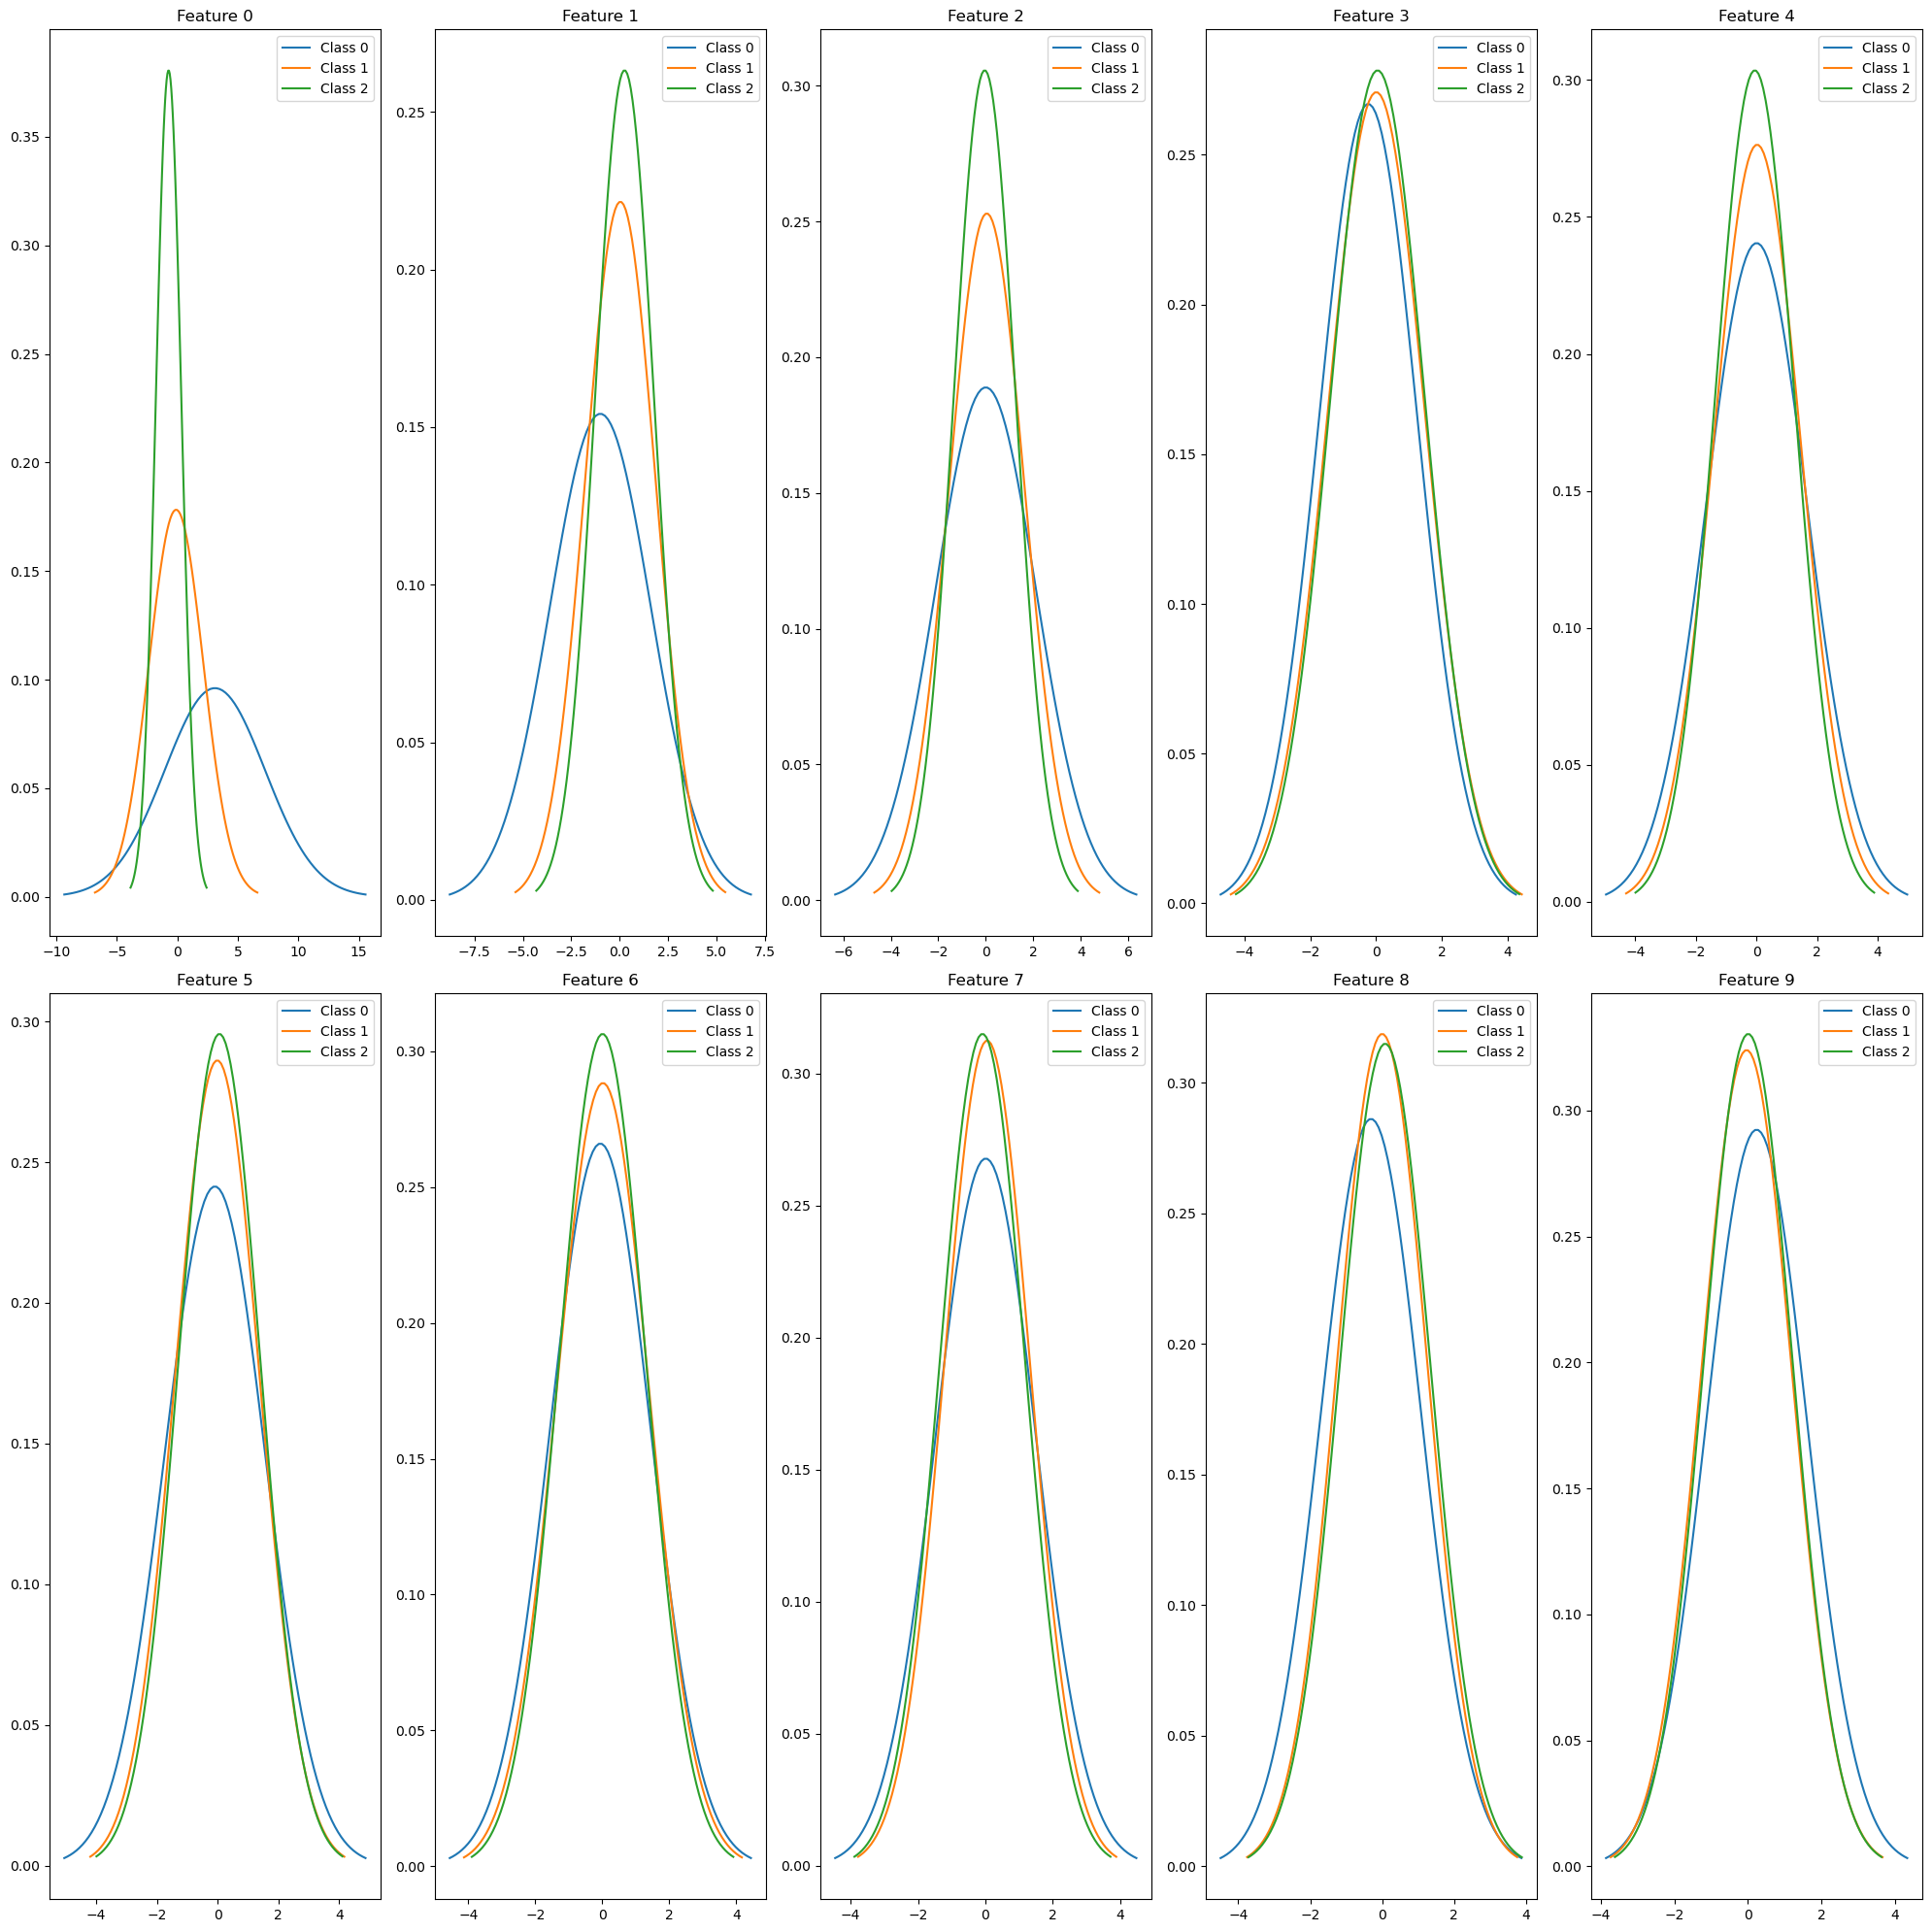

In [103]:
# Vẽ đồ thị phân phối Gaussian
classes = np.unique(y_pca_train)
features = X_pca_train.shape[1]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 20))
axes = axes.flatten()

for feature_idx in range(features):
    for class_idx in classes:
        # Lấy các mẫu thuộc lớp hiện tại
        X_class = X_pca_train[y_pca_train.values.ravel() == class_idx, feature_idx]
        
        # Tính toán mean và variance
        mean = np.mean(X_class)
        variance = np.var(X_class)
        std_dev = np.sqrt(variance)
        
        # Tạo dữ liệu cho đường cong Gaussian
        x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
        y = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
        
        # Vẽ đường cong
        axes[feature_idx].plot(x, y, label=f'Class {class_idx}')
        axes[feature_idx].set_title(f'Feature {feature_idx}')
        axes[feature_idx].legend()

plt.tight_layout()
plt.show()